STEP 1: DATA LOADING AND INSPECTION
---------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Classifier module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

In [3]:
telecom.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
telecom.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

In [5]:
#Shape of the dataframe
print("The number of rows: {}".format(telecom.shape[0]))

print("The number of columns:{}".format(telecom.shape[1]))

The number of rows: 3333
The number of columns:21


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
telecom.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
print(telecom['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64


In [9]:
#Check the discriptive statistics
telecom.describe().transpose()

count        mean        std     min     25%     50%  \
account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
account length          127.00  243.00  
area code               510.00  510.00  
number vmail messages    20.00   51.00  
total day minutes       216.40  350.80  
total day calls         114.00  165.00  
total day charge         36.79   59.64  
total eve minutes       235.30  363.70  
total eve calls         114.00  170.00  
total eve charge         20.00   30.91  
total night minutes     235.30  395.00  
total night calls       113.00  175.00  
total night charge       10.59   17.77  
total intl minutes       12.10   20.00  
total intl calls          6.00   20.00  
total intl charge         3.27    5.40  
customer service calls    2.00    9.00

STEP 2: DATA CLEANING
-------------------------

In [10]:
#Checking for missing values
telecom.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
#Checking for duplictes
telecom.duplicated().sum()

0

In [12]:
# Get all columns from the dataset
all_columns = telecom.columns.tolist()  # Extract all column names from the dataset

# Predefined categorical variables and target
categorical_vars = ['state', 'international plan', 'voice mail plan', 'area code']
target = ['churn']
# Dynamically identify numerical variables as the rest
numerical_vars = [col for col in telecom.columns if col.strip().lower() not in [c.lower() for c in categorical_vars + target]]
# Define light blue color for text
light_blue = '\033[94m'
reset_color = '\033[0m'

# Print the results for confirmation with counts and colored titles
print(f"{light_blue}Categorical Variables ({len(categorical_vars)}):{reset_color}", categorical_vars)
print(f"{light_blue}Target Variable ({len(target)}):{reset_color}", target)
print(f"{light_blue}Numerical Variables ({len(numerical_vars)}):{reset_color}", numerical_vars)

Categorical Variables (4): ['state', 'international plan', 'voice mail plan', 'area code']
Target Variable (1): ['churn']
Numerical Variables (16): ['account length', 'phone number', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [13]:
#Checking for duplicates
telecom.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [14]:
telecom.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

2.1 OUTLIERS DETECTION
-------------

In [15]:
#Detecting outlier using IQR (Interquartile Range)
numeric_data = telecom.select_dtypes(include=['number'])

#Calculate the first and third quartile
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

#Calculate the interquartile range (IQR)
IQR = Q3 - Q1
#Detect Outlier
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()


print(outliers.T)

account length             18
area code                   0
number vmail messages       1
total day minutes          25
total day calls            23
total day charge           25
total eve minutes          24
total eve calls            20
total eve charge           24
total night minutes        30
total night calls          22
total night charge         30
total intl minutes         46
total intl calls           78
total intl charge          49
customer service calls    267
dtype: int64


In [16]:
#Calculate skewness for all  numerical columns
skewness = telecom.select_dtypes(include=['number']).skew()
#Display the skewness values
print(skewness)

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64


STEP 3: EXPLORATORY DATA ANALYSIS
----------------

In [17]:
#Calculating the % of International plans
telecom['international plan'].value_counts(normalize=True)

international plan
no     0.90309
yes    0.09691
Name: proportion, dtype: float64

In [18]:
#Calculating the % of International plans
telecom['voice mail plan'].value_counts(normalize=True)

voice mail plan
no     0.723372
yes    0.276628
Name: proportion, dtype: float64

In [19]:
#Calculating the % of churn
telecom['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [20]:
#Calculating the % of area code
telecom['area code'].value_counts(normalize=True)

area code
415    0.496550
510    0.252025
408    0.251425
Name: proportion, dtype: float64

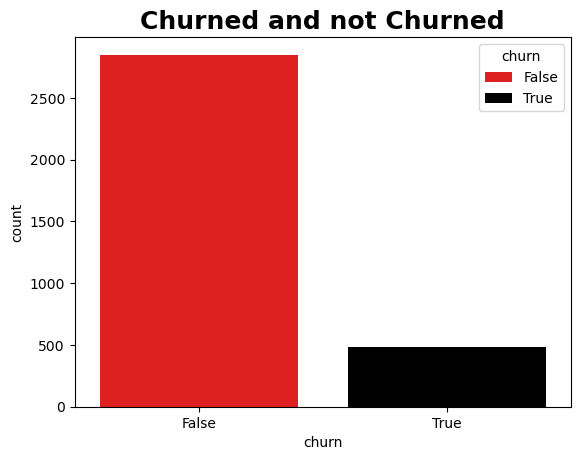

In [21]:
#Target Variable Distribution
sns.countplot(x = 'churn', data=telecom, hue= "churn", palette=('Red', 'black'))
plt.title('Churned and not Churned', size=18, color='black', fontweight= 'bold')
plt.show()

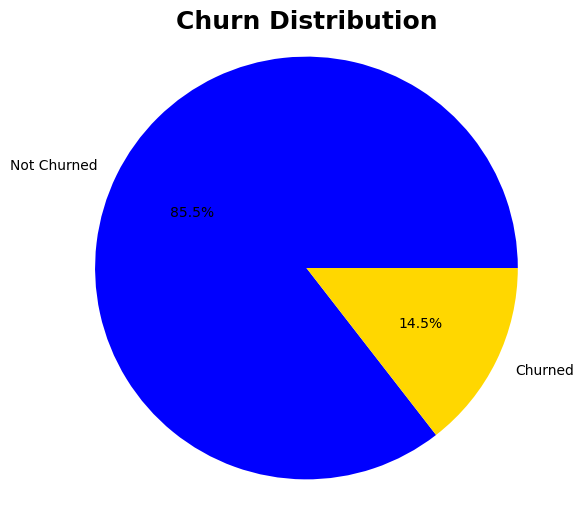

In [22]:
#Visualizing the churn distribution
#Create the pie chart
fig = plt.figure(figsize=(6,6))
colors = ['blue', 'gold']
plt.title('Churn Distribution', size=18, color='black', fontweight= 'bold' )
plt.pie(telecom['churn'].value_counts(), labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')
#Show the plot
plt.show()

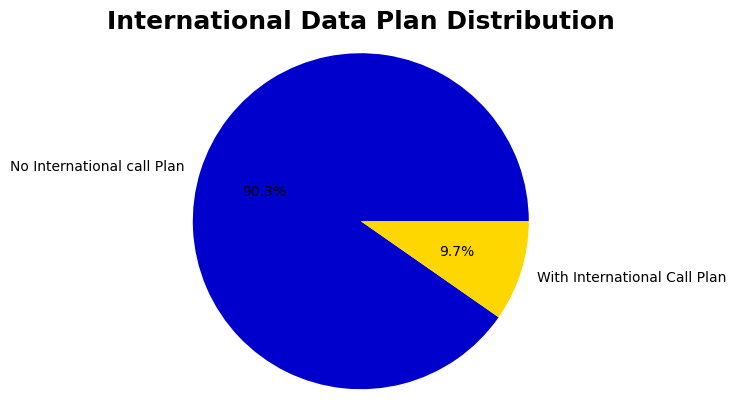

In [23]:
# Visualizing the data plan distribution
# Creating a pie chart
colors = ['mediumblue', 'gold'] 
plt.title('International Data Plan Distribution', size=18, color='black', fontweight= 'bold')
plt.pie(telecom['international plan'].value_counts(),labels=['No International call Plan','With International Call Plan'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.show()

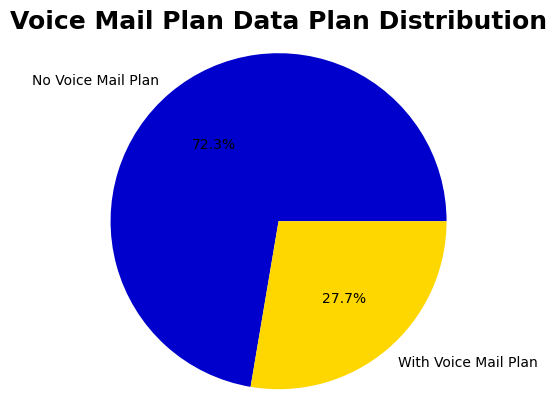

In [24]:
# Visualizing the data plan distribution
# Creating a pie chart
colors = ['mediumblue', 'gold'] 
plt.title('Voice Mail Plan Data Plan Distribution', size=18, color='black', fontweight= 'bold')
plt.pie(telecom['voice mail plan'].value_counts(),labels=['No Voice Mail Plan','With Voice Mail Plan'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.show()

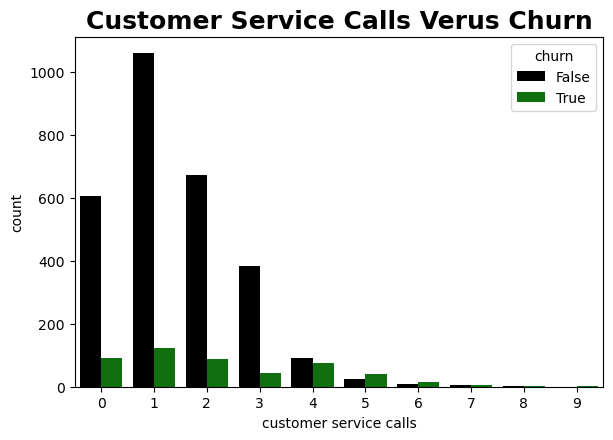

In [25]:
#Histrogram plots to show  distribution of customer with international plan with respect to churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=telecom['customer service calls'],hue= telecom['churn'], palette=("black", "green"))
plt.title("Customer Service Calls Verus Churn", size=18, color='black', fontweight= 'bold')

plt.show()

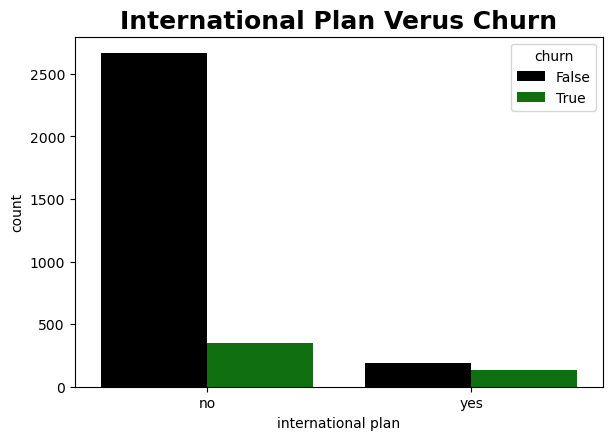

In [26]:
#Histrogram plots to show  distribution of customer with international plan with respect to churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=telecom['international plan'],hue= telecom['churn'], palette=("black", "green"))
plt.title("International Plan Verus Churn", size=18, color='black', fontweight= 'bold')

plt.show()

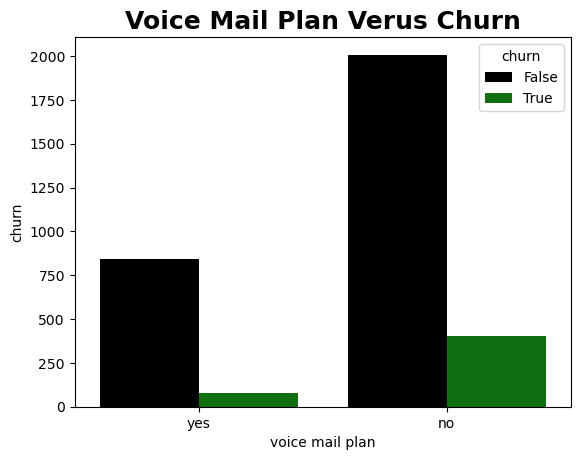

In [27]:
#Histrogram plots to show distribution of customers with Voice Mail Plan with respect to Churn
sns.countplot(x=telecom['voice mail plan'],hue= telecom['churn'], palette=("black", "green"))
plt.title("Voice Mail Plan Verus Churn", size=18, color='black', fontweight= 'bold')
plt.xlabel('voice mail plan')
plt.ylabel('churn')
plt.show()

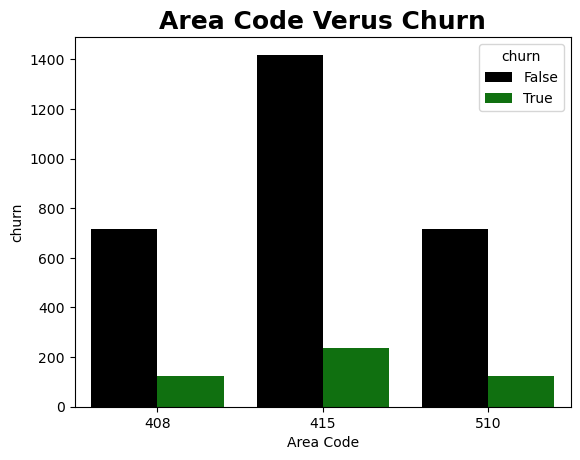

In [28]:
#Histrogram plots to show distribution of customers with Area Code with respect to Churn
sns.countplot(x=telecom['area code'],hue= telecom['churn'], palette=("black", "green"))
plt.title("Area Code Verus Churn", size=18, color='black', fontweight= 'bold')
plt.xlabel('Area Code')
plt.ylabel('churn')
plt.show()

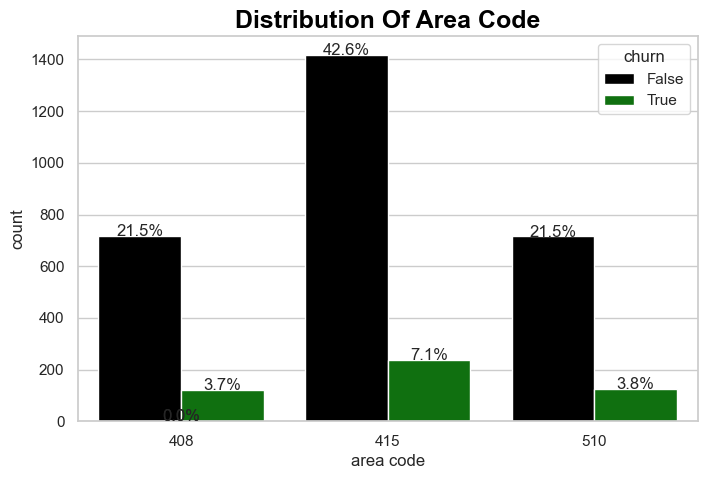

In [29]:
telecom['area code'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = (len(telecom))

ax = sns.countplot(x= "area code", hue='churn', data=telecom, palette=("black", "green", "red"))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center')
    plt.title('Distribution Of Area Code', fontweight='bold', size= 18, color='black')
    #plt.show()

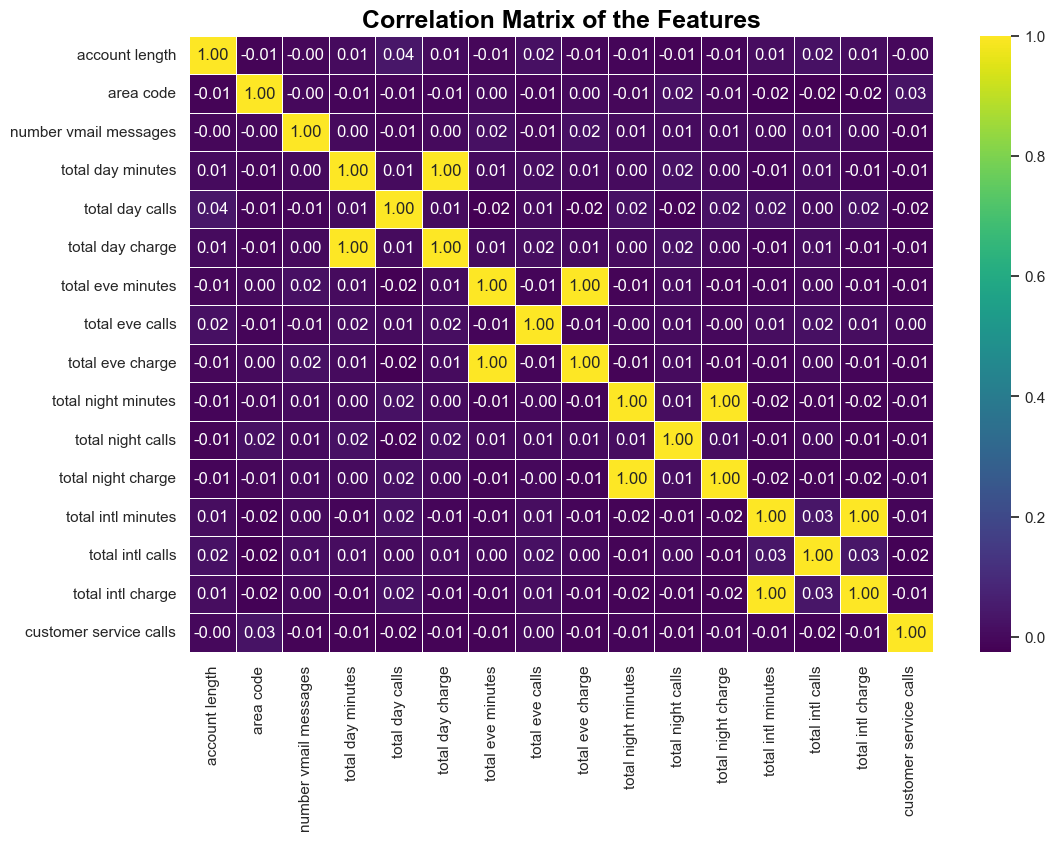

In [30]:
# Visualizing the correlation matrix
#le = LabelEncoder()
#telecom['churn']= le.fit_transform(telecom['churn'])
# Select only numeric columns for correlation calculation
numeric_data = telecom.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of the Features", size=18, fontweight='bold', color='black')
plt.show()


In [31]:
correlation_matrix

account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl charge               -0.011067         0.008674         -0.011074   
customer service calls          -0.012985         0.002423         -0.012987   

         

In [32]:
#Calculating the % of International plans
telecom['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

STEP 4: Data Preprocessing
----------------
4.1 Encoding
-----------------

In [33]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

In [34]:
#Check the discriptive statistics
df1.describe().transpose()

count        mean        std    min     25%     50%  \
account length          3333.0  101.064806  39.822106   1.00   74.00  101.00   
international plan      3333.0    0.096910   0.295879   0.00    0.00    0.00   
voice mail plan         3333.0    0.276628   0.447398   0.00    0.00    0.00   
number vmail messages   3333.0    8.099010  13.688365   0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389   0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084   0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435   0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844   0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625   0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668   0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847  23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609  33.00   87.00  100.00   
total night charge      3333.0    9.039325   2.275873   1.04    7.52    9.05   
total intl minutes      3333.0   10.237294   2.791840   0.00    8.50   10.30   
total intl calls        3333.0    4.479448   2.461214   0.00    3.00    4.00   
total intl charge       3333.0    2.764581   0.753773   0.00    2.30    2.78   
customer service calls  3333.0    1.562856   1.315491   0.00    1.00    1.00   
churn                   3333.0    0.144914   0.352067   0.00    0.00    0.00   

                           75%     max  
account length          127.00  243.00  
international plan        0.00    1.00  
voice mail plan           1.00    1.00  
number vmail messages    20.00   51.00  
total day minutes       216.40  350.80  
total day calls         114.00  165.00  
total day charge         36.79   59.64  
total eve minutes       235.30  363.70  
total eve calls         114.00  170.00  
total eve charge         20.00   30.91  
total night minutes     235.30  395.00  
total night calls       113.00  175.00  
total night charge       10.59   17.77  
total intl minutes       12.10   20.00  
total intl calls          6.00   20.00  
total intl charge         3.27    5.40  
customer service calls    2.00    9.00  
churn                     0.00    1.00

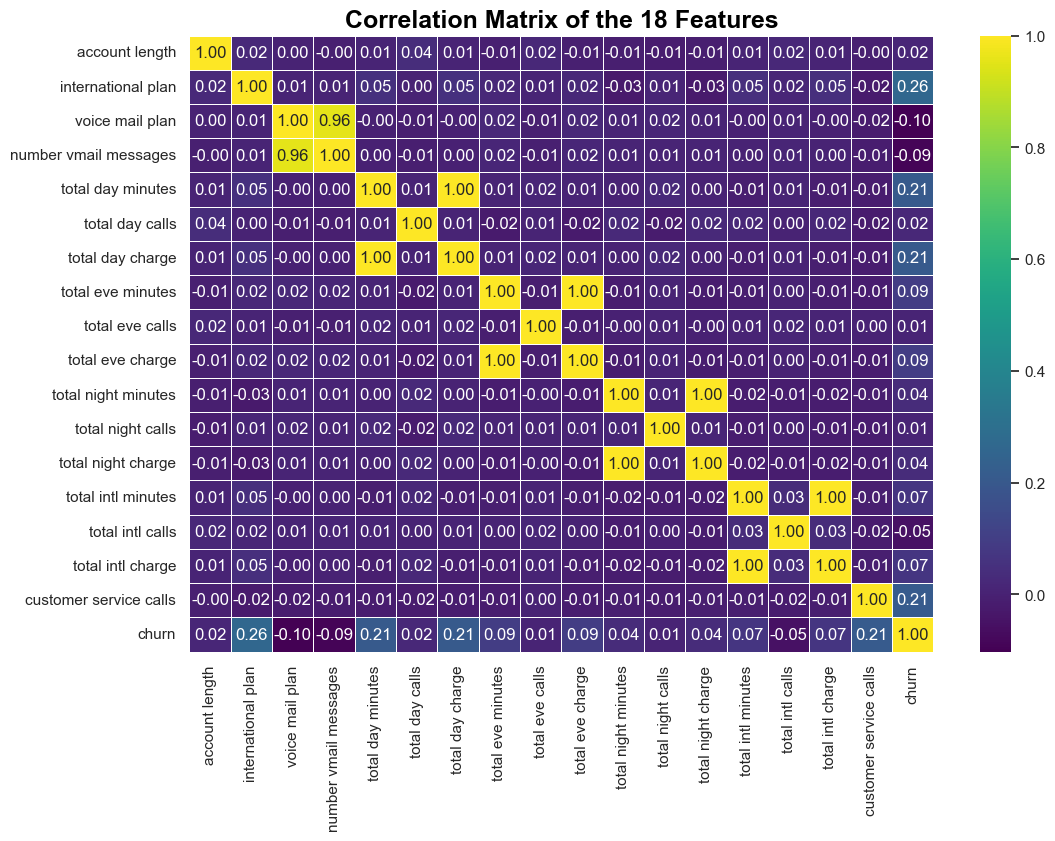

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


In [35]:
# Select only numeric columns for correlation calculation
numeric_data = df1.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of the 18 Features", size=18, fontweight='bold', color='black')
plt.show()


churn_correlation=correlation_matrix['churn'].sort_values(ascending=False)
print(churn_correlation)

4.2 FEATURES SCALING / STANDARDIZATION
--------------------

In [36]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

df1.head()

account length  international plan  voice mail plan  number vmail messages  \
0        0.524793                 0.0              1.0               0.490196   
1        0.438017                 0.0              1.0               0.509804   
2        0.561983                 0.0              0.0               0.000000   
3        0.342975                 1.0              0.0               0.000000   
4        0.305785                 1.0              0.0               0.000000   

   total day minutes  total day calls  total day charge  total eve minutes  \
0           0.755701         0.666667          0.755701           0.542755   
1           0.460661         0.745455          0.460597           0.537531   
2           0.693843         0.690909          0.693830           0.333242   
3           0.853478         0.430303          0.853454           0.170195   
4           0.475200         0.684848          0.475184           0.407754   

   total eve calls  total eve charge  total night minutes  total night calls  \
0         0.582353          0.542866             0.595750           0.408451   
1         0.605882          0.537690             0.621840           0.492958   
2         0.647059          0.333225             0.374933           0.500000   
3         0.517647          0.170171             0.467187           0.394366   
4         0.717647          0.407959             0.440290           0.619718   

   total night charge  total intl minutes  total intl calls  \
0            0.595935               0.500              0.15   
1            0.622236               0.685              0.15   
2            0.375374               0.610              0.25   
3            0.467424               0.330              0.35   
4            0.440526               0.505              0.15   

   total intl charge  customer service calls  churn  
0           0.500000                0.111111    0.0  
1           0.685185                0.111111    0.0  
2           0.609259                0.000000    0.0  
3           0.329630                0.222222    0.0  
4           0.505556                0.333333    0.0

In [37]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


Imbalanced class distribution:
 churn
0.0    2338
1.0     395
Name: count, dtype: int64


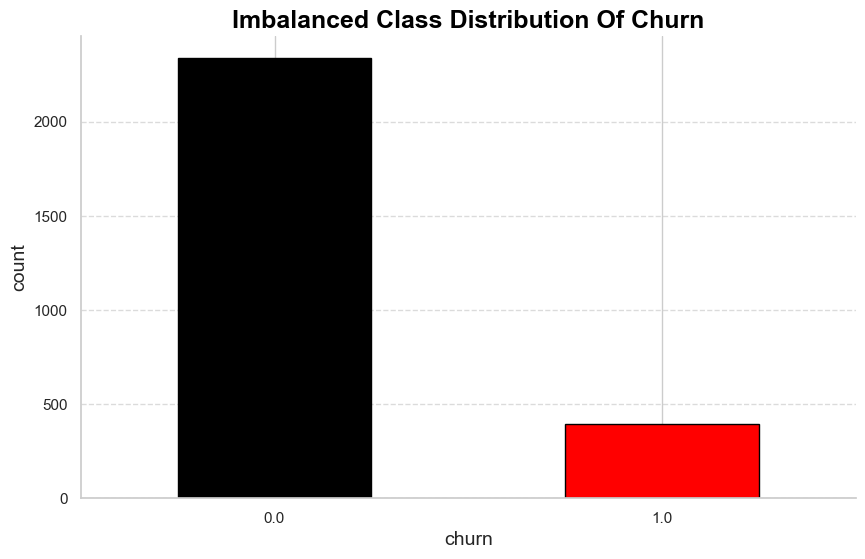

In [38]:
#Verify the Imbalanced class distribution
imbalanced_class_counts = pd.Series(y_train).value_counts()
print("Imbalanced class distribution:\n", imbalanced_class_counts)

#Plotting the resampled class distribution
plt.figure(figsize=(10, 6))
imbalanced_class_counts.plot(kind='bar', color=['black','red'], edgecolor='black')
plt.title('Imbalanced Class Distribution Of Churn', size=18, color='black', fontweight= 'bold')
plt.xlabel('churn', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

4.3 SMOTE
------------

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


Resampled class distribution:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


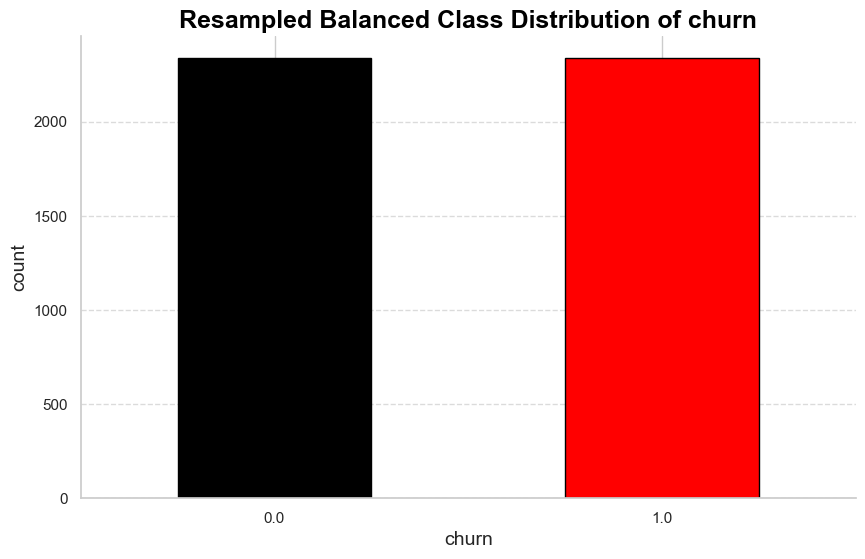

In [40]:
#Verify the resampled class distribution
resampled_class_counts = pd.Series(y_train_resampled).value_counts()
print("Resampled class distribution:\n", resampled_class_counts)

#Plotting the resampled class distribution
plt.figure(figsize=(10, 6))
resampled_class_counts.plot(kind='bar', color=['black','red'], edgecolor='black')
plt.title('Resampled Balanced Class Distribution of churn', fontsize=16, size=18, fontweight='bold', color='black')
plt.xlabel('churn', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



STEP 5: DATA MODELING
-------------

5.1 LOGISTIC REGRESSION
------------

In [41]:
#Initialize the Logistic Regression model
lr = LogisticRegression()

#Train the model
lr.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_lr = lr.predict(X_test)


#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
auc_roc = roc_auc_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy :.4f}")
print(f"Logistic Regression Precision: {precision :.4f}")
print(f"Logistic Regression recall: {recall :.4f}")
print(f"Logistic Regression f1_score: {f1 :.4f}")
print(f"Logistic Regression auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_lr))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", lr.score(X_train, y_train))
print("Training Resampled Accuracy :", lr.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", lr.score(X_test, y_test))

Logistic Regression Accuracy: 0.7767
Logistic Regression Precision: 0.3693
Logistic Regression recall: 0.7386
Logistic Regression f1_score: 0.4924
Logistic Regression auc_roc: 0.7609
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       512
         1.0       0.37      0.74      0.49        88

    accuracy                           0.78       600
   macro avg       0.66      0.76      0.67       600
weighted avg       0.86      0.78      0.80       600

Confusion Matrix:
 [[401 111]
 [ 23  65]]
ROC AUC Score: 0.83251953125
Training Accuracy : 0.7749725576289791
Training Resampled Accuracy : 0.7748075278015398
Testing Accuracy : 0.7766666666666666


5.1.1 CONFUSION MATRIX FOR LOGISTIC REGRESSION
-------------------

In [42]:
y_pred_lr = lr.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_lr).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 65
False positives: 111
True negatives: 401
False negatives: 23



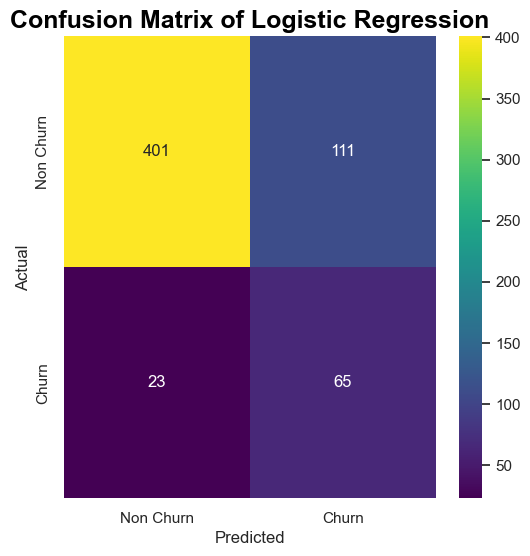

In [43]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
         yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression', size=18, color='black', fontweight= 'bold')
plt.show()


5.2 DECISION TREE CLASSIFIER
--------------

In [44]:
#Initialize the Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

#Train the model
dt.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_dt = dt.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
auc_roc = roc_auc_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy :.4f}")
print(f"Decision Tree Classifier Precision: {precision :.4f}")
print(f"Decision Tree Classifier recall: {recall :.4f}")
print(f"Decision Tree Classifier f1_score: {f1 :.4f}")
print(f"Decision Tree Classifier auc_roc: {auc_roc :.4f}")

print(classification_report(y_test, y_pred_dt))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", dt.score(X_train, y_train))
print("Training Resampled Accuracy :", dt.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", dt.score(X_test, y_test))

Decision Tree Classifier Accuracy: 0.9117
Decision Tree Classifier Precision: 0.6549
Decision Tree Classifier recall: 0.8409
Decision Tree Classifier f1_score: 0.7363
Decision Tree Classifier auc_roc: 0.8824
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       512
         1.0       0.65      0.84      0.74        88

    accuracy                           0.91       600
   macro avg       0.81      0.88      0.84       600
weighted avg       0.92      0.91      0.92       600

Confusion Matrix:
 [[473  39]
 [ 14  74]]
ROC AUC Score: 0.8823686079545454
Training Accuracy : 1.0
Training Resampled Accuracy : 1.0
Testing Accuracy : 0.9116666666666666


5.2.1 CONFUSION MATRIX FOR DECISION TREE CLASSIFIER
------------------

In [45]:
y_pred_dt = dt.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_dt).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 74
False positives: 39
True negatives: 473
False negatives: 14



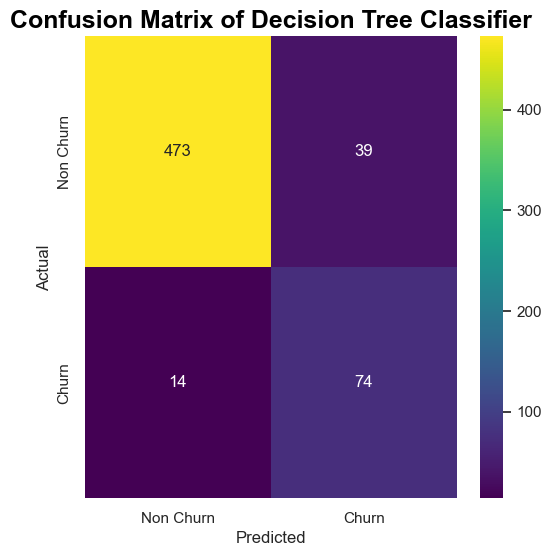

In [46]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

5.3 RANDOM FOREST
------------

In [47]:
#Initialize the Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

#Train the model
rf.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_rf = rf.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc_roc = roc_auc_score(y_test, y_pred_rf)
print(f"RandomForest Classifier Accuracy: {accuracy :.4f}")
print(f"RandomForest Classifier Precision: {precision :.4f}")
print(f"RandomForest Classifier recall: {recall :.4f}")
print(f"RandomForest Classifier f1_score: {f1 :.4f}")
print(f"RandomForest Classifierr auc_roc: {auc_roc :.4f}")

print(classification_report(y_test, y_pred_rf))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", rf.score(X_train, y_train))
print("Training Resampled Accuracy :", rf.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", rf.score(X_test, y_test))

RandomForest Classifier Accuracy: 0.9500
RandomForest Classifier Precision: 0.8295
RandomForest Classifier recall: 0.8295
RandomForest Classifier f1_score: 0.8295
RandomForest Classifierr auc_roc: 0.9001
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       512
         1.0       0.83      0.83      0.83        88

    accuracy                           0.95       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:
 [[497  15]
 [ 15  73]]
ROC AUC Score: 0.9322065873579546
Training Accuracy : 1.0
Training Resampled Accuracy : 1.0
Testing Accuracy : 0.95


5.3.1 CONFUSION MATRIX FOR RANDOM FOREST
--------------------

In [48]:
y_pred_rf = rf.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_rf).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 73
False positives: 15
True negatives: 497
False negatives: 15



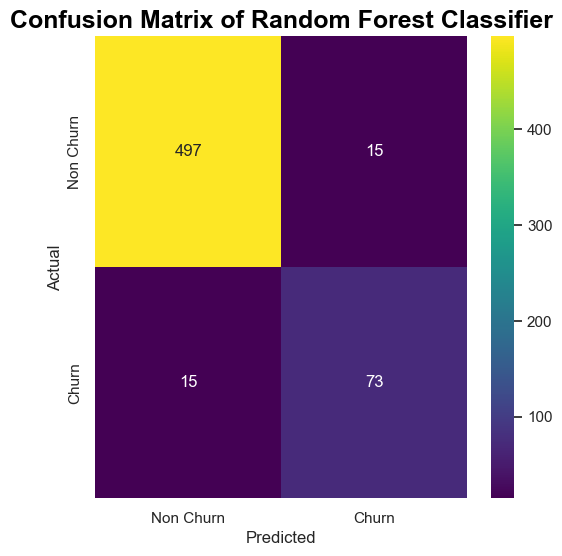

In [49]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

5.4 GRADIENT BOOSTING CLASSIFIER
----------------

In [50]:
#Initialize the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

#Train the model
gbc.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_gbc = gbc.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_gbc)
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)
f1 = f1_score(y_test, y_pred_gbc)
auc_roc = roc_auc_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier Accuracy: {accuracy :.4f}")
print(f"Gradient Boosting Classifier Precision: {precision :.4f}")
print(f"Gradient Boosting Classifier recall: {recall :.4f}")
print(f"Gradient Boosting Classifier f1_score: {f1 :.4f}")
print(f"Gradient Boosting Classifier auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_gbc))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("ROC AUC Score:", roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]))

print ("Gradient Boosting Classifier")
print("Training Accuracy :", gbc.score(X_train, y_train))
print("Training Resampled Accuracy :", gbc.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", gbc.score(X_test, y_test))

Gradient Boosting Classifier Accuracy: 0.9483
Gradient Boosting Classifier Precision: 0.8132
Gradient Boosting Classifier recall: 0.8409
Gradient Boosting Classifier f1_score: 0.8268
Gradient Boosting Classifier auc_roc: 0.9039
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       512
         1.0       0.81      0.84      0.83        88

    accuracy                           0.95       600
   macro avg       0.89      0.90      0.90       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:
 [[495  17]
 [ 14  74]]
ROC AUC Score: 0.922607421875
Gradient Boosting Classifier
Training Accuracy : 0.9582875960482986
Training Resampled Accuracy : 0.9591531223267751
Testing Accuracy : 0.9483333333333334


5.4.1 CONFUSION MATRIX FOR GRADIENT BOOSTING CLASSIFIER
---------------------------

In [51]:
y_pred_gbc = gbc.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_gbc).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 74
False positives: 17
True negatives: 495
False negatives: 14



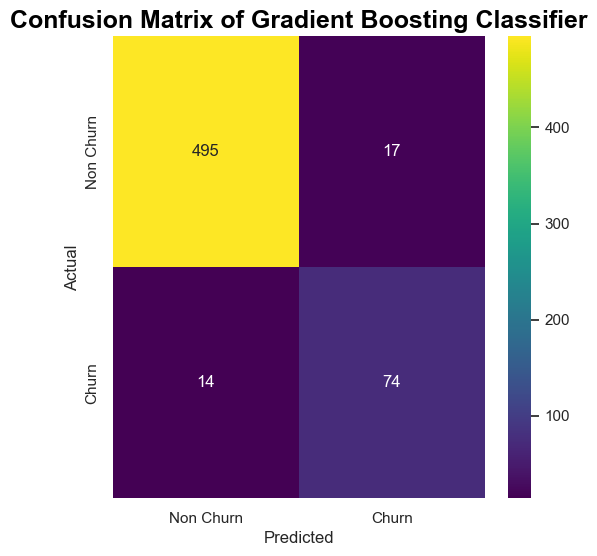

In [52]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbc)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Gradient Boosting Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

5.5 KNEIGHBORSCLASSIFIER
----------------

In [53]:
#Initialize the Gradient Boosting model
knn =  KNeighborsClassifier ()

#Train the model
knn.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_knn = knn.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc_roc = roc_auc_score(y_test, y_pred_knn)
print(f"KNeighbors Classifier Accuracy: {accuracy :.4f}")
print(f"KNeighbors Classifier Precision: {precision :.4f}")
print(f"KNeighbors Classifier recall: {recall :.4f}")
print(f"KNeighbors Classifier f1_score: {f1 :.4f}")
print(f"KNeighbors Classifier auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_knn))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

print ("KNeighbors Classifier")
print("Training Accuracy :", knn.score(X_train, y_train))
print("Training Resampled Accuracy :", knn.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", knn.score(X_test, y_test))

KNeighbors Classifier Accuracy: 0.8033
KNeighbors Classifier Precision: 0.4085
KNeighbors Classifier recall: 0.7614
KNeighbors Classifier f1_score: 0.5317
KNeighbors Classifier auc_roc: 0.7860
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88       512
         1.0       0.41      0.76      0.53        88

    accuracy                           0.80       600
   macro avg       0.68      0.79      0.70       600
weighted avg       0.87      0.80      0.83       600

Confusion Matrix:
 [[415  97]
 [ 21  67]]
ROC AUC Score: 0.8526611328125
KNeighbors Classifier
Training Accuracy : 0.8880351262349067
Training Resampled Accuracy : 0.9341317365269461
Testing Accuracy : 0.8033333333333333


5.5.1 CONFUSION MATRIX FOR K-NEAREST NEIGHBORS CLASSIFIER
----------------------

In [54]:
y_pred_knn = knn.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_knn).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 67
False positives: 97
True negatives: 415
False negatives: 21



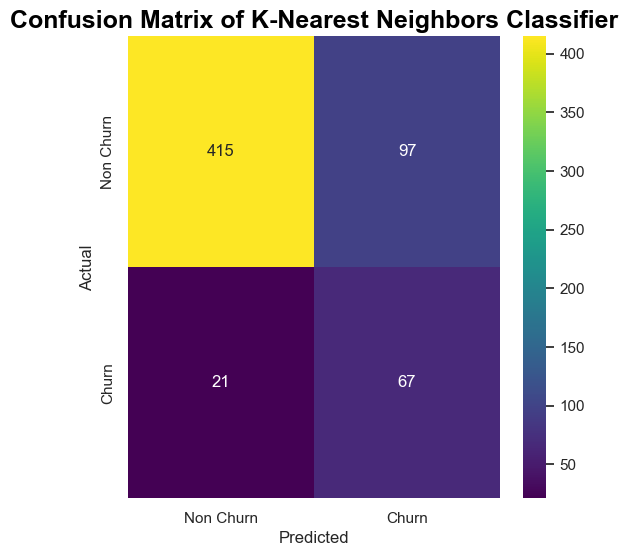

In [55]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of K-Nearest Neighbors Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

5.6 NAIVE BAYES
------------

In [56]:
#Initialize the Gradient Boosting model
nb =  GaussianNB()

#Train the model
nb.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_nb = nb.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
auc_roc = roc_auc_score(y_test, y_pred_nb)
print(f"Naive Bayes accuracy: {accuracy :.4f}")
print(f"Naive Bayes precision: {precision :.4f}")
print(f"Naive Bayes recall: {recall :.4f}")
print(f"Naive Bayes f1_score: {f1 :.4f}")
print(f"Naive Bayes auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_nb))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", nb.score(X_train, y_train))
print("Training Resampled Accuracy :", nb.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", nb.score(X_test, y_test))

Naive Bayes accuracy: 0.7933
Naive Bayes precision: 0.3953
Naive Bayes recall: 0.7727
Naive Bayes f1_score: 0.5231
Naive Bayes auc_roc: 0.7848
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87       512
         1.0       0.40      0.77      0.52        88

    accuracy                           0.79       600
   macro avg       0.67      0.78      0.70       600
weighted avg       0.87      0.79      0.82       600

Confusion Matrix:
 [[408 104]
 [ 20  68]]
ROC AUC Score: 0.8153852982954546
Training Accuracy : 0.7925356750823271
Training Resampled Accuracy : 0.8021813515825492
Testing Accuracy : 0.7933333333333333


5.6.1 CONFUSION MATRIX FOR  NAIVE BAYES CLASSIFIER
----------------------

In [57]:
y_pred_nb = nb.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_nb).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 68
False positives: 104
True negatives: 408
False negatives: 20



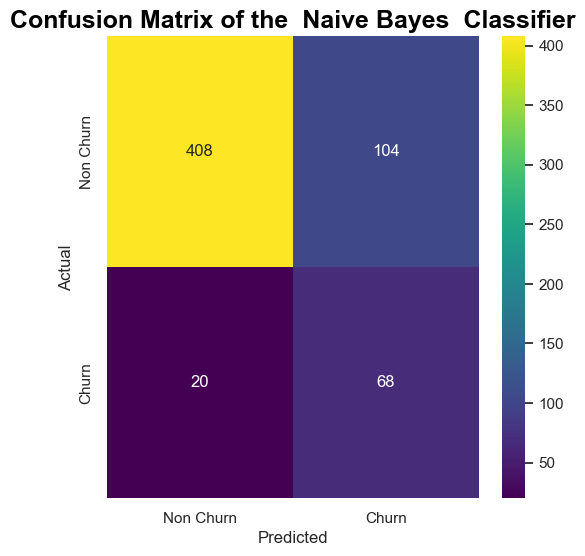

In [58]:
cm = confusion_matrix(y_test, y_pred_nb)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the  Naive Bayes  Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

5.7 MLP CLASSIFIER (NEURAL NETWORK)
------------------

In [59]:
#Initialize the Gradient Boosting model
mlp =  MLPClassifier(random_state=42)

#Train the model
mlp.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_mlp = mlp.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)
auc_roc = roc_auc_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy :.4f}")
print(f"MLP Classifier Precision: {precision :.4f}")
print(f"MLP Classifier recall: {recall :.4f}")
print(f"MLP Classifier f1_score: {f1 :.4f}")
print(f"MLP Classifier auc_roc: {auc_roc:.4f}")
print(classification_report(y_test, y_pred_mlp))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("ROC AUC Score:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", mlp.score(X_train, y_train))
print("Training Resampled Accuracy :", mlp.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", mlp.score(X_test, y_test))

MLP Classifier Accuracy: 0.8850
MLP Classifier Precision: 0.5772
MLP Classifier recall: 0.8068
MLP Classifier f1_score: 0.6730
MLP Classifier auc_roc: 0.8526
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       512
         1.0       0.58      0.81      0.67        88

    accuracy                           0.89       600
   macro avg       0.77      0.85      0.80       600
weighted avg       0.91      0.89      0.89       600

Confusion Matrix:
 [[460  52]
 [ 17  71]]
ROC AUC Score: 0.9171697443181819
Training Accuracy : 0.8840102451518478
Training Resampled Accuracy : 0.886655260906758
Testing Accuracy : 0.885


5.7.1 CONFUSION MATRIX FOR MLP CLASSIFIER
---------------------

In [60]:
y_pred_mlp = mlp.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_mlp).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 71
False positives: 52
True negatives: 460
False negatives: 17



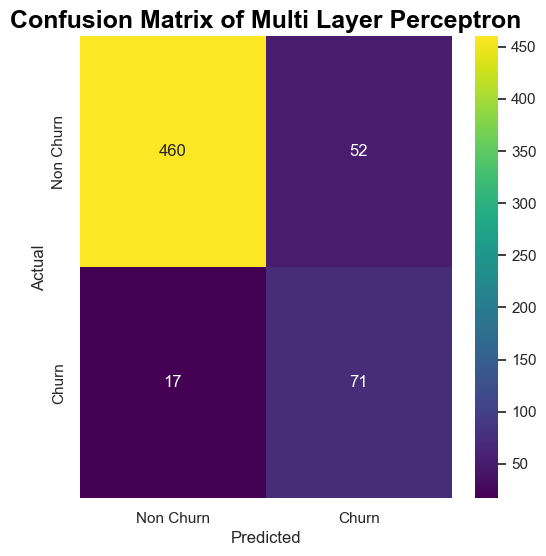

In [61]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Multi Layer Perceptron', size=18, color='black', fontweight= 'bold')
plt.show()

5.8 ADABOOSTING CLASSIFIER
--------------

In [62]:
#Initialize the Ada Boosting model
ada =  AdaBoostClassifier(random_state=42)

#Train the model
ada.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_ada = ada.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)
auc_roc = roc_auc_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy :.5f}")
print(f"AdaBoost Classifier Precision: {precision :.4f}")
print(f"AdaBoost Classifier recall: {recall :.4f}")
print(f"AdaBoost Classifier f1_score: {f1 :.4f}")
print(f"AdaBoost Classifier auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_ada))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("ROC AUC Score:", roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", ada.score(X_train, y_train))
print("Training Resampled Accuracy :", ada.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", ada.score(X_test, y_test))

AdaBoost Classifier Accuracy: 0.86667
AdaBoost Classifier Precision: 0.5345
AdaBoost Classifier recall: 0.7045
AdaBoost Classifier f1_score: 0.6078
AdaBoost Classifier auc_roc: 0.7995
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       512
         1.0       0.53      0.70      0.61        88

    accuracy                           0.87       600
   macro avg       0.74      0.80      0.76       600
weighted avg       0.89      0.87      0.87       600

Confusion Matrix:
 [[458  54]
 [ 26  62]]
ROC AUC Score: 0.8845436789772727
Training Accuracy : 0.8715697036223929
Training Resampled Accuracy : 0.8887938408896493
Testing Accuracy : 0.8666666666666667


CONFUSION MATRIX FOR ADABOOSTING CLASSIFER
---------------------

In [63]:
y_pred_ada = ada.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_ada).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 62
False positives: 54
True negatives: 458
False negatives: 26



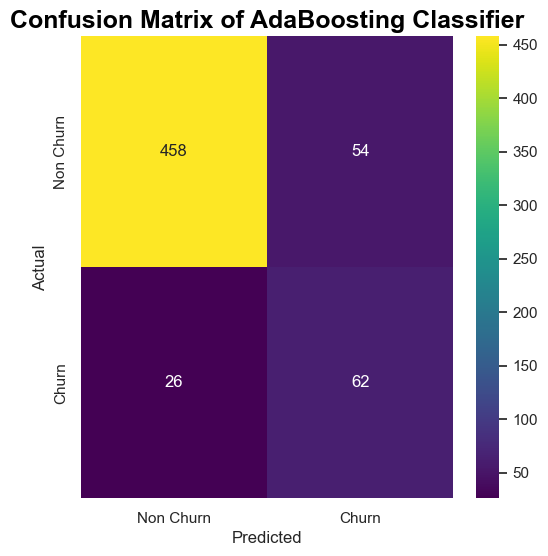

In [64]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of AdaBoosting Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

STEP 6: EVALUATION OF THE MACHINE LEARNING ALGORITHMS
---------------------

In [65]:
final_data = pd.DataFrame({"ALGORITHMS":["Logistic Regression", "DecisionTree Classifier", "RandomForest Classifier", "GradientBoosting Classifier",
                                        "K-Nearest Neighbors Classifier", "NaiveBayes Classifier", "Multi Layer Perceptron", "AdaBoosting Classifier"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_lr)*100, accuracy_score(y_test, y_pred_dt)*100, accuracy_score(y_test, y_pred_rf)*100,
                        accuracy_score(y_test, y_pred_gbc)*100, accuracy_score(y_test, y_pred_knn)*100, accuracy_score(y_test, y_pred_nb)*100,
                                     accuracy_score(y_test, y_pred_mlp)*100, accuracy_score(y_test, y_pred_ada)*100 ],
                         "PRECISION":[precision_score(y_test, y_pred_lr)*100, precision_score(y_test, y_pred_dt)*100, precision_score(y_test, y_pred_rf)*100,
                        precision_score(y_test, y_pred_gbc)*100, precision_score(y_test, y_pred_knn)*100, precision_score(y_test, y_pred_nb)*100,
                                     precision_score(y_test, y_pred_mlp)*100, precision_score(y_test, y_pred_ada)*100],
                          "RECALL":[recall_score(y_test, y_pred_lr)*100, recall_score(y_test, y_pred_dt)*100, recall_score(y_test, y_pred_rf)*100,
                        recall_score(y_test, y_pred_gbc)*100, recall_score(y_test, y_pred_knn)*100, recall_score(y_test, y_pred_nb)*100,
                                     recall_score(y_test, y_pred_mlp)*100, recall_score(y_test, y_pred_ada)*100 ],
                          "F1_SCORE":[f1_score(y_test, y_pred_lr)*100, f1_score(y_test, y_pred_dt)*100, f1_score(y_test, y_pred_rf)*100,
                        f1_score(y_test, y_pred_gbc)*100, f1_score(y_test, y_pred_knn)*100, f1_score(y_test, y_pred_nb)*100,
                                     f1_score(y_test, y_pred_mlp)*100,  f1_score(y_test, y_pred_ada)*100 ], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_lr)*100,roc_auc_score(y_test, y_pred_dt)*100, roc_auc_score(y_test, y_pred_rf)*100,
                        roc_auc_score(y_test, y_pred_gbc)*100, roc_auc_score(y_test, y_pred_knn)*100, roc_auc_score(y_test, y_pred_nb)*100,
                                     roc_auc_score(y_test, y_pred_mlp)*100,  roc_auc_score(y_test, y_pred_ada)*100 ], 
                           
                        })

final_data

ALGORITHMS   ACCURACY  PRECISION     RECALL   F1_SCORE  \
0             Logistic Regression  77.666667  36.931818  73.863636  49.242424   
1         DecisionTree Classifier  91.166667  65.486726  84.090909  73.631841   
2         RandomForest Classifier  95.000000  82.954545  82.954545  82.954545   
3     GradientBoosting Classifier  94.833333  81.318681  84.090909  82.681564   
4  K-Nearest Neighbors Classifier  80.333333  40.853659  76.136364  53.174603   
5           NaiveBayes Classifier  79.333333  39.534884  77.272727  52.307692   
6          Multi Layer Perceptron  88.500000  57.723577  80.681818  67.298578   
7          AdaBoosting Classifier  86.666667  53.448276  70.454545  60.784314   

     ROC_AUC  
0  76.091974  
1  88.236861  
2  90.012429  
3  90.385298  
4  78.595526  
5  78.480114  
6  85.262784  
7  79.953835

6.1 BARCHART FOR CLASSIFICATION METRICS
---------------------

ACCURACY
---------

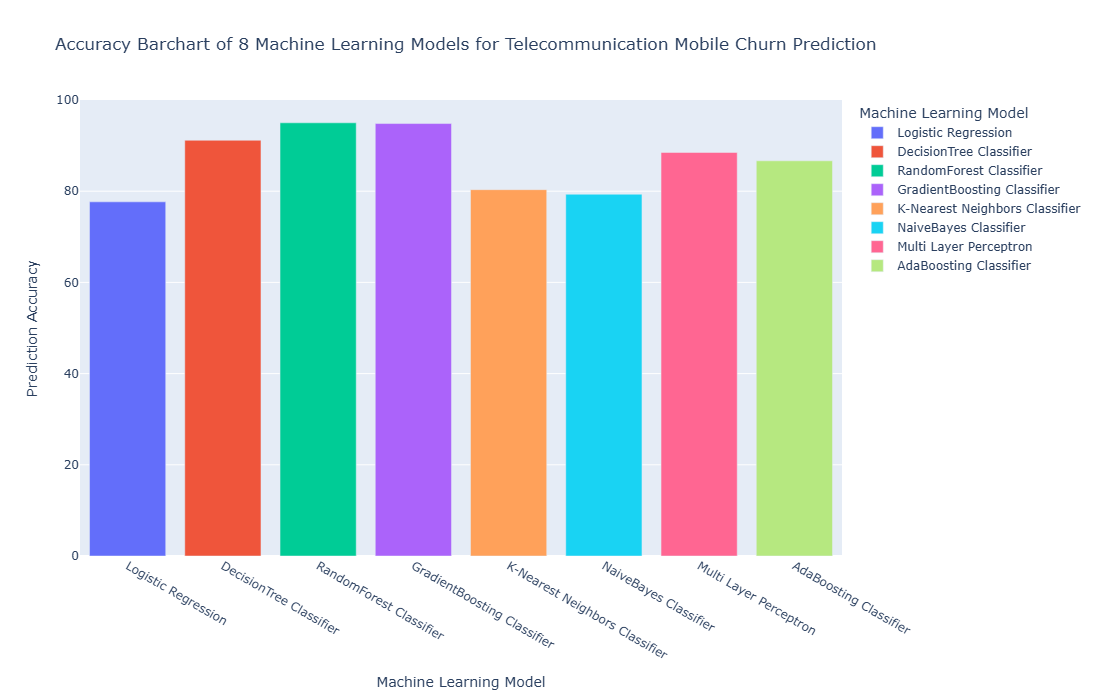

In [66]:
fig = px.bar(final_data, x='ALGORITHMS', y='ACCURACY', color='ALGORITHMS', 
            title='Accuracy Barchart of 8 Machine Learning Models for Telecommunication Mobile Churn Prediction',
             labels={'ALGORITHMS': 'Machine Learning Model', 'ACCURACY': 'Prediction Accuracy'}
            )
fig.update_layout(height=700, width=1000)
# Show the plot
plt.show()
fig.show()

PRECISION
-------------

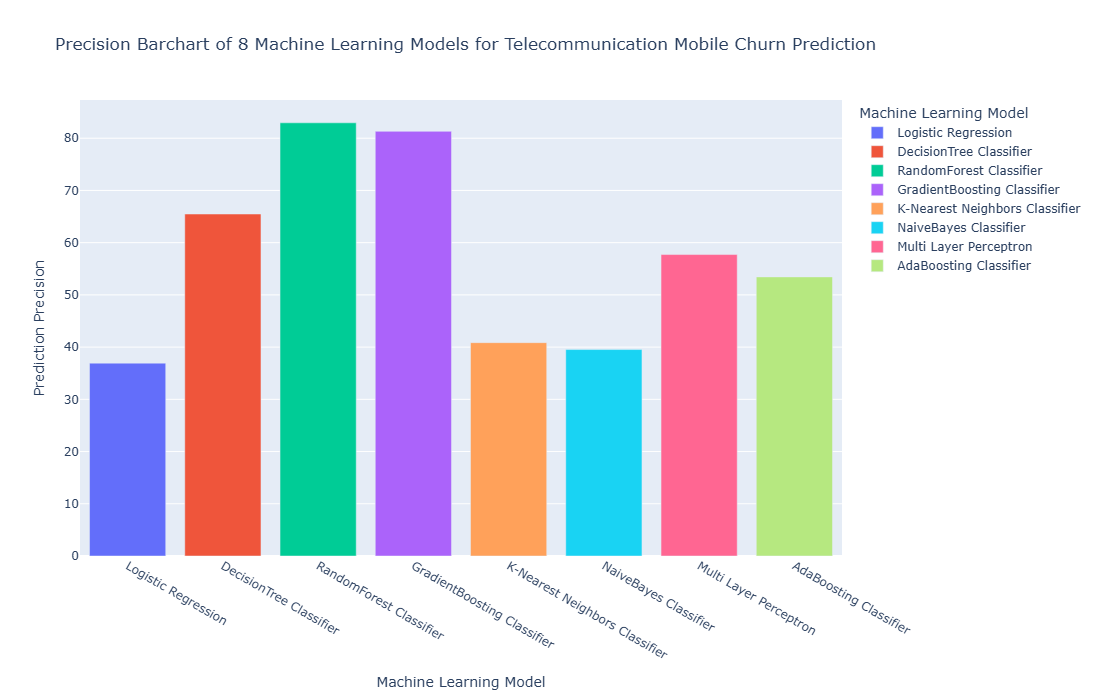

In [67]:
fig = px.bar(final_data, x='ALGORITHMS', y='PRECISION', color='ALGORITHMS', 
            title='Precision Barchart of 8 Machine Learning Models for Telecommunication Mobile Churn Prediction',
             labels={'ALGORITHMS': 'Machine Learning Model', 'PRECISION': 'Prediction Precision'}
            )
fig.update_layout(height=700, width=1000)
# Show the plot
plt.show()
fig.show()

RECALL
---------

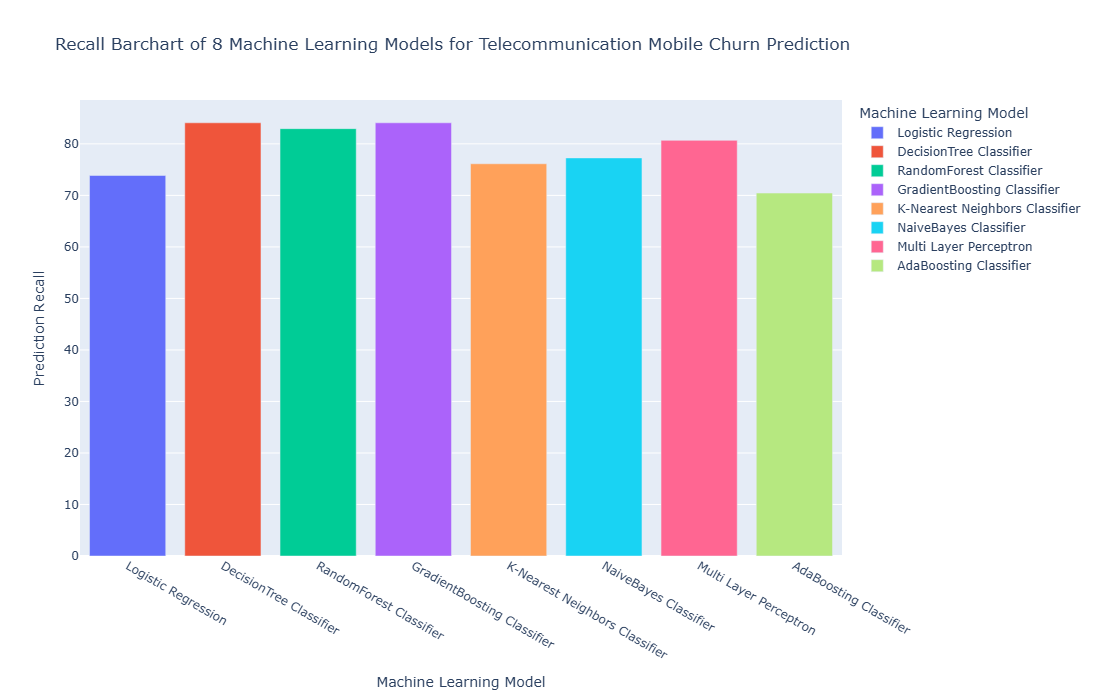

In [68]:
fig = px.bar(final_data, x='ALGORITHMS', y='RECALL', color='ALGORITHMS', 
            title='Recall Barchart of 8 Machine Learning Models for Telecommunication Mobile Churn Prediction',
             labels={'ALGORITHMS': 'Machine Learning Model', 'RECALL': 'Prediction Recall'}
            )
fig.update_layout(height=700, width=1000)
# Show the plot
plt.show()
fig.show()

F1_SCORE
-----------

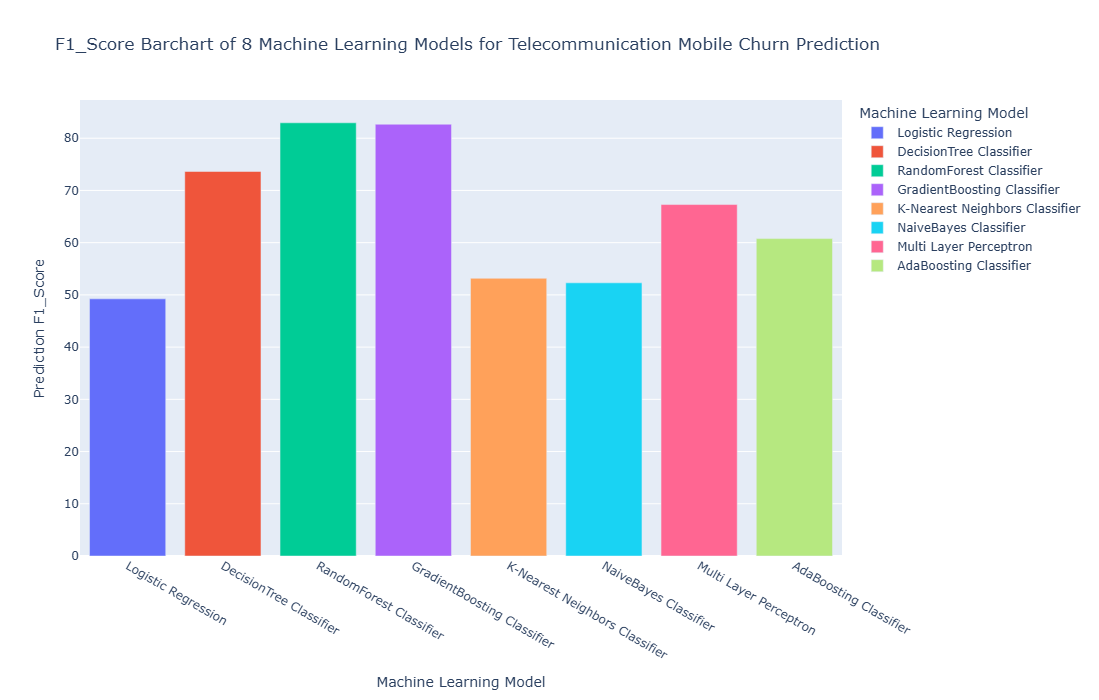

In [69]:
fig = px.bar(final_data, x='ALGORITHMS', y='F1_SCORE', color='ALGORITHMS', 
            title='F1_Score Barchart of 8 Machine Learning Models for Telecommunication Mobile Churn Prediction',
             labels={'ALGORITHMS': 'Machine Learning Model', 'F1_SCORE': 'Prediction F1_Score'}
            )
fig.update_layout(height=700, width=1000)
# Show the plot
plt.show()
fig.show()

ROC_AUC CURVE
---------

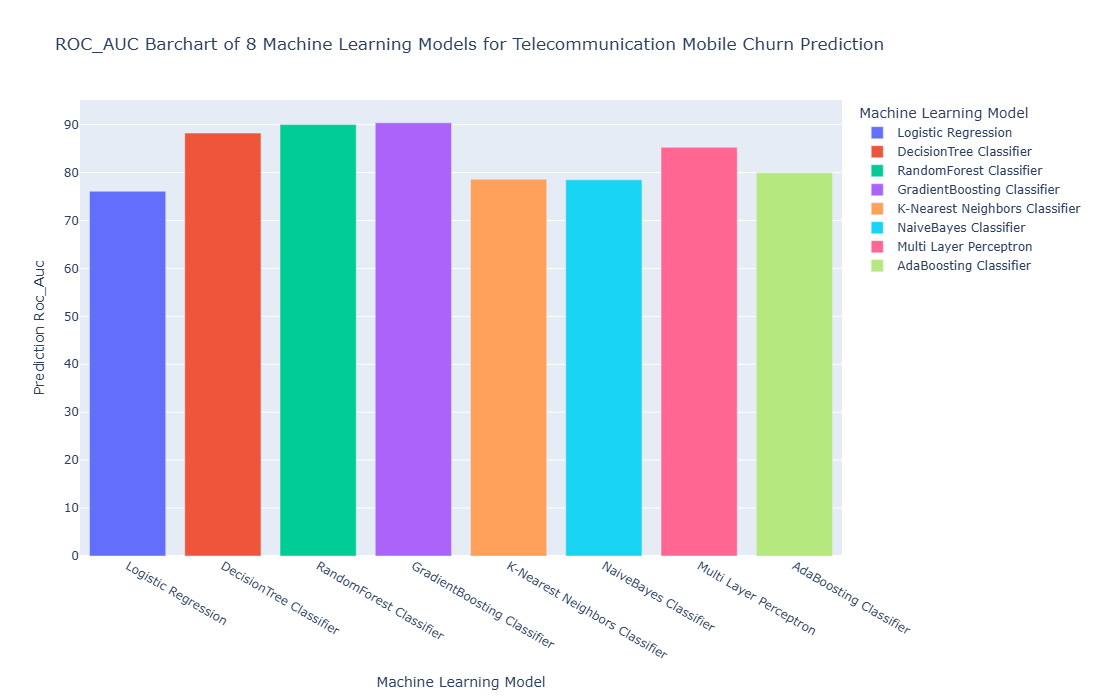

In [70]:
fig = px.bar(final_data, x='ALGORITHMS', y='ROC_AUC', color='ALGORITHMS', 
            title='ROC_AUC Barchart of 8 Machine Learning Models for Telecommunication Mobile Churn Prediction',
             labels={'ALGORITHMS': 'Machine Learning Model', 'ROC_AUC': 'Prediction Roc_Auc'}
            )
fig.update_layout(height=700, width=1000)
# Show the plot
plt.show()
fig.show()

STEP 7: K_FOLD CROSS VALIDATION
------------------

7.1 Logistic Regression model performance with 10 Fold Cross Validation
------------

ACCURACY
----

In [71]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_accuracies = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(lr_accuracies)
lr_avg_accuracy = np.mean(lr_accuracies)
lr_std_accuracy = np.std(lr_accuracies)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_accuracy * 100:.2f}%")

[0.79273504 0.76495726 0.75854701 0.74145299 0.78418803 0.75213675
 0.78586724 0.75588865 0.80728051 0.7751606 ]
The std score of cross validation using Logistic Regression algorithm is 1.96%
The mean score of cross validation using Logistic Regression (LR) algorithm is 77.18%


PRECISION
------

In [72]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_precision = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(lr_precision)
lr_avg_precision = np.mean(lr_precision)
lr_std_precision = np.std(lr_precision)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_precision * 100:.2f}%")

[0.79399142 0.7605042  0.76190476 0.73839662 0.78540773 0.74789916
 0.79295154 0.75536481 0.81858407 0.78414097]
The std score of cross validation using Logistic Regression algorithm is 2.37%
The mean score of cross validation using Logistic Regression (LR) algorithm is 77.39%


RECALL
----

In [73]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_recall = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(lr_recall)
lr_avg_recall = np.mean(lr_recall)
lr_std_recall = np.std(lr_recall)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_recall * 100:.2f}%")

[0.79059829 0.77350427 0.75213675 0.74786325 0.78205128 0.76068376
 0.77253219 0.75536481 0.79059829 0.76068376]
The std score of cross validation using Logistic Regression algorithm is 1.48%
The mean score of cross validation using Logistic Regression (LR) algorithm is 76.86%


F1_SCORE
----

In [74]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_f1 = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(lr_f1)
lr_avg_f1 = np.mean(lr_f1)
lr_std_f1 = np.std(lr_f1)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_f1 * 100:.2f}%")

[0.79229122 0.76694915 0.75698925 0.74309979 0.78372591 0.75423729
 0.7826087  0.75536481 0.80434783 0.77223427]
The std score of cross validation using Logistic Regression algorithm is 1.84%
The mean score of cross validation using Logistic Regression (LR) algorithm is 77.12%


7.2 Decision Tree Classifier model performance with 10 Fold Cross Validation
-------------

ACCURACY
---

In [75]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
dt_accuracies = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(dt_accuracies)
dt_avg_accuracy = np.mean(dt_accuracies)
dt_std_accuracy = np.std(dt_accuracies)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_accuracy * 100:.2f}%")

[0.93589744 0.93162393 0.9017094  0.9465812  0.92521368 0.91239316
 0.93147752 0.92077088 0.91862955 0.93576017]
The std score of cross validation using DecisionTree Classifier algorithm is 1.24%
The mean score of cross validation using DecisionTree Classifier algorithm is 92.60%


PRECISION
----

In [76]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
dt_precision = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(dt_precision)
dt_avg_precision = np.mean(dt_precision)
dt_std_precision = np.std(dt_precision)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_precision * 100:.2f}%")

[0.92857143 0.91393443 0.8852459  0.93723849 0.91286307 0.907173
 0.8972332  0.89837398 0.92608696 0.925     ]
The std score of cross validation using DecisionTree Classifier algorithm is 1.55%
The mean score of cross validation using DecisionTree Classifier algorithm is 91.32%


RECALL
-----

In [77]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
dt_recall = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(dt_recall)
dt_avg_recall = np.mean(dt_recall)
dt_std_recall = np.std(dt_recall)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_recall * 100:.2f}%")

[0.94444444 0.95299145 0.92307692 0.95726496 0.94017094 0.91880342
 0.97424893 0.94849785 0.91025641 0.94871795]
The std score of cross validation using DecisionTree Classifier algorithm is 1.84%
The mean score of cross validation using DecisionTree Classifier algorithm is 94.18%


F1_SCORE
---

In [78]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
dt_f1 = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(dt_f1)
dt_avg_f1 = np.mean(dt_f1)
dt_std_f1 = np.std(dt_f1)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_f1 * 100:.2f}%")

[0.94444444 0.95299145 0.92307692 0.95726496 0.94017094 0.91880342
 0.97424893 0.94849785 0.91025641 0.94871795]
The std score of cross validation using DecisionTree Classifier algorithm is 1.84%
The mean score of cross validation using DecisionTree Classifier algorithm is 94.18%


7.3 Random Forest Classifier model performance with 10 Fold Cross Validation
-------------

ACCURACY
-----

In [79]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#log_reg = LogisticRegression()
rf_accuracies = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(rf_accuracies)
rf_avg_accuracy = np.mean(rf_accuracies)
rf_std_accuracy = np.std(rf_accuracies)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_accuracy * 100:.2f}%")

[0.97649573 0.94871795 0.94444444 0.95726496 0.96367521 0.95299145
 0.96788009 0.95931478 0.9614561  0.97002141]
The std score of cross validation using RandomForest Classifier algorithm is 0.94%
The mean score of cross validation using RandomForest Classifier algorithm is 96.02%


PRECISION
-----

In [80]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_precision = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(rf_precision)
rf_avg_precision = np.mean(rf_precision)
rf_std_precision = np.std(rf_precision)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_precision * 100:.2f}%")

[0.99118943 0.96875    0.96428571 0.9612069  0.96969697 0.96902655
 0.96982759 0.96929825 0.95378151 0.98245614]
The std score of cross validation using RandomForest Classifier algorithm is 0.99%
The mean score of cross validation using RandomForest Classifier algorithm is 97.00%


RECALL
-----

In [81]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_recall = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(rf_recall)
rf_avg_recall = np.mean(rf_recall)
rf_std_recall = np.std(rf_recall)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_recall * 100:.2f}%")

[0.96153846 0.92735043 0.92307692 0.95299145 0.95726496 0.93589744
 0.96566524 0.94849785 0.97008547 0.95726496]
The std score of cross validation using RandomForest Classifier algorithm is 1.53%
The mean score of cross validation using RandomForest Classifier algorithm is 95.00%


F1_SCORE
-----

In [82]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_f1 = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(rf_f1)
rf_avg_f1 = np.mean(rf_f1)
rf_std_f1 = np.std(rf_f1)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_f1 * 100:.2f}%")

[0.97613883 0.94759825 0.94323144 0.95708155 0.96344086 0.95217391
 0.96774194 0.95878525 0.96186441 0.96969697]
The std score of cross validation using RandomForest Classifier algorithm is 0.97%
The mean score of cross validation using RandomForest Classifier algorithm is 95.98%


7.4 Gradient Boosting Classifier model performance with 10 Fold Cross Validation
-----------------------

ACCURACY
----

In [83]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_accuracies = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(gbc_accuracies)
gbc_avg_accuracy = np.mean(gbc_accuracies)
gbc_std_accuracy = np.std(gbc_accuracies)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_accuracy * 100:.2f}%")

[0.96367521 0.93589744 0.93589744 0.94017094 0.9465812  0.94017094
 0.94646681 0.93576017 0.94218415 0.94860814]
The std score of cross validation using GradientBoosting Classifier algorithm is 0.81%
The mean score of cross validation using GradientBoosting Classifier algorithm is 94.35%


PRECISION
----

In [84]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_precision = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(gbc_precision)
gbc_avg_precision = np.mean(gbc_precision)
gbc_std_precision = np.std(gbc_precision)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_precision * 100:.2f}%")

[0.97797357 0.95132743 0.95132743 0.95982143 0.95633188 0.96396396
 0.96846847 0.93939394 0.96832579 0.97727273]
The std score of cross validation using GradientBoosting Classifier algorithm is 1.16%
The mean score of cross validation using GradientBoosting Classifier algorithm is 96.14%


RECALL
-----

In [85]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_recall = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(gbc_recall)
gbc_avg_recall = np.mean(gbc_recall)
gbc_std_recall = np.std(gbc_recall)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_recall * 100:.2f}%")

[0.94871795 0.91880342 0.91880342 0.91880342 0.93589744 0.91452991
 0.92274678 0.93133047 0.91452991 0.91880342]
The std score of cross validation using GradientBoosting Classifier algorithm is 1.05%
The mean score of cross validation using GradientBoosting Classifier algorithm is 92.43%


F1_SCORE
----

In [86]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_f1 = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(gbc_f1)
gbc_avg_f1 = np.mean(gbc_f1)
gbc_std_f1= np.std(gbc_f1)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_f1 * 100:.2f}%")

[0.96312364 0.93478261 0.93478261 0.93886463 0.94600432 0.93859649
 0.94505495 0.93534483 0.94065934 0.94713656]
The std score of cross validation using GradientBoosting Classifier algorithm is 0.82%
The mean score of cross validation using GradientBoosting Classifier algorithm is 94.24%


7.5 KNeigbhors Classifier model performance with 10 Fold Cross Validation
----------------

ACCURACY
-----

In [87]:
kf = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)
knn_accuracies = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(knn_accuracies)
knn_avg_accuracy = np.mean(knn_accuracies)
knn_std_accuracy = np.std(knn_accuracies)
print(f"The std score of cross validation using KNeighbors Classifier algorithm is {knn_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using KNeighbors Classifier algorithm is {knn_avg_accuracy * 100:.2f}%")

[0.92521368 0.88675214 0.90598291 0.89316239 0.89316239 0.90384615
 0.9143469  0.90149893 0.91006424 0.91220557]
The std score of cross validation using KNeighbors Classifier algorithm is 1.10%
The mean score of cross validation using KNeighbors Classifier algorithm is 90.46%


PRECISION
----

In [88]:
kf = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)
knn_precision = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(knn_precision)
knn_avg_precision = np.mean(knn_precision)
knn_std_precision = np.std(knn_precision)
print(f"The std score of cross validation using KNeighbors Classifier algorithm is {knn_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using KNeighbors Classifier algorithm is {knn_avg_precision * 100:.2f}%")

[0.878327   0.81978799 0.84926471 0.83333333 0.83093525 0.84870849
 0.85608856 0.84       0.85036496 0.85608856]
The std score of cross validation using KNeighbors Classifier algorithm is 1.55%
The mean score of cross validation using KNeighbors Classifier algorithm is 84.63%


RECALL
----

In [89]:
kf = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)
knn_recall = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(knn_recall)
knn_avg_recall = np.mean(knn_recall)
knn_std_recall = np.std(knn_recall)
print(f"The std score of cross validation using KNeighbors Classifier algorithm is {knn_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using KNeighbors Classifier algorithm is {knn_avg_recall * 100:.2f}%")

[0.98717949 0.99145299 0.98717949 0.98290598 0.98717949 0.98290598
 0.99570815 0.99141631 0.9957265  0.99145299]
The std score of cross validation using KNeighbors Classifier algorithm is 0.44%
The mean score of cross validation using KNeighbors Classifier algorithm is 98.93%


F1_SCORE
---

In [90]:
kf = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)
knn_f1 = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(knn_f1)
knn_avg_f1 = np.mean(knn_f1)
knn_std_f1 = np.std(knn_f1)
print(f"The std score of cross validation using KNeighbors Classifier algorithm is {knn_std_f1* 100:.2f}%")
print(f"The mean score of cross validation using KNeighbors Classifier algorithm is {knn_avg_f1 * 100:.2f}%")

[0.92957746 0.89748549 0.91304348 0.90196078 0.90234375 0.91089109
 0.92063492 0.90944882 0.91732283 0.91881188]
The std score of cross validation using KNeighbors Classifier algorithm is 0.93%
The mean score of cross validation using KNeighbors Classifier algorithm is 91.22%


7.6 NaiveBayes model performance with 10 Fold Cross Validation
----------------

ACCURACY
----

In [91]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_accuracies = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(nb_accuracies)
nb_avg_accuracy = np.mean(nb_accuracies)
nb_std_accuracy = np.std(nb_accuracies)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_accuracy * 100:.2f}%")

[0.79700855 0.77564103 0.80982906 0.78846154 0.8034188  0.79700855
 0.82012848 0.78800857 0.81156317 0.79443255]
The std score of cross validation using NaiveBayes algorithm is 1.24%
The mean score of cross validation using NaiveBayes algorithm is 79.86%


PRECISION
-----

In [92]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_precision = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(nb_precision)
nb_avg_precision = np.mean(nb_precision)
nb_std_precision = np.std(nb_precision)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_precision * 100:.2f}%")

[0.8008658  0.7611336  0.80082988 0.77777778 0.78861789 0.79574468
 0.81974249 0.7887931  0.82589286 0.7875    ]
The std score of cross validation using NaiveBayes algorithm is 1.79%
The mean score of cross validation using NaiveBayes algorithm is 79.47%


RECALL
-----

In [93]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_recall = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(nb_recall)
nb_avg_recall = np.mean(nb_recall)
nb_std_recall = np.std(nb_recall)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_recall * 100:.2f}%")

[0.79059829 0.8034188  0.82478632 0.80769231 0.82905983 0.7991453
 0.81974249 0.78540773 0.79059829 0.80769231]
The std score of cross validation using NaiveBayes algorithm is 1.43%
The mean score of cross validation using NaiveBayes algorithm is 80.58%


F1_SCORE
---

In [94]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_f1 = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(nb_f1)
nb_avg_f1 = np.mean(nb_f1)
nb_std_f1 = np.std(nb_f1)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_f1 * 100:.2f}%")

[0.79569892 0.78170478 0.81263158 0.79245283 0.80833333 0.79744136
 0.81974249 0.78709677 0.80786026 0.79746835]
The std score of cross validation using NaiveBayes algorithm is 1.13%
The mean score of cross validation using NaiveBayes algorithm is 80.00%


7.7 MLP Classifier model performance with 10 Fold Cross Validation
--------------

ACCURACY
----

In [95]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_accuracies = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(mlp_accuracies)
mlp_avg_accuracy = np.mean(mlp_accuracies)
mlp_std_accuracy = np.std(mlp_accuracies)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_accuracy * 100:.2f}%")

[0.91025641 0.87393162 0.87179487 0.84401709 0.89529915 0.85683761
 0.88650964 0.88650964 0.88222698 0.87152034]
The std score of cross validation using MLP algorithm is 1.79%
The mean score of cross validation using MLP algorithm is 87.79%


PRECISION
-----

In [96]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_precision = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(mlp_precision)
mlp_avg_precision = np.mean(mlp_precision)
mlp_std_precision = np.std(mlp_precision)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_precision * 100:.2f}%")

[0.9173913  0.87553648 0.88157895 0.84255319 0.89361702 0.8583691
 0.88135593 0.88135593 0.87447699 0.85365854]
The std score of cross validation using MLP algorithm is 2.01%
The mean score of cross validation using MLP algorithm is 87.60%


RECALL
----

In [97]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_recall = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(mlp_recall)
mlp_avg_recall = np.mean(mlp_recall)
mlp_std_recall = np.std(mlp_recall)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_recall * 100:.2f}%")

[0.9017094  0.87179487 0.85897436 0.84615385 0.8974359  0.85470085
 0.89270386 0.89270386 0.89316239 0.8974359 ]
The std score of cross validation using MLP algorithm is 1.97%
The mean score of cross validation using MLP algorithm is 88.07%


F1_SCORE
----

In [98]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_f1 = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(mlp_f1)
mlp_avg_f1= np.mean(mlp_f1)
mlp_std_f1 = np.std(mlp_f1)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_f1 * 100:.2f}%")

[0.90948276 0.87366167 0.87012987 0.84434968 0.89552239 0.85653105
 0.8869936  0.8869936  0.88372093 0.875     ]
The std score of cross validation using MLP algorithm is 1.78%
The mean score of cross validation using MLP algorithm is 87.82%


7.8 AdaBoosting Classifier model performance with 10 Fold Cross Validation
-------------------

ACCURACY
---

In [99]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_accuracies = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(ada_accuracies)
ada_avg_accuracy = np.mean(ada_accuracies)
ada_std_accuracy = np.std(ada_accuracies)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_accuracy * 100:.2f}%")

[0.89529915 0.87179487 0.8525641  0.8482906  0.88888889 0.87179487
 0.875803   0.88650964 0.87794433 0.89079229]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.49%
The mean score of cross validation using AdaBoosting Classifier algorithm is 87.60%


PRECISION
-----

In [100]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_precision = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(ada_precision)
ada_avg_precision = np.mean(ada_precision)
ada_std_precision = np.std(ada_precision)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_precision * 100:.2f}%")

[0.90393013 0.88839286 0.86343612 0.86547085 0.88888889 0.88839286
 0.88209607 0.90178571 0.89333333 0.9030837 ]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.36%
The mean score of cross validation using AdaBoosting Classifier algorithm is 88.79%


RECALL
----

In [101]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_recall = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(ada_recall)
ada_avg_recall = np.mean(ada_recall)
ada_std_recall = np.std(ada_recall)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_recall * 100:.2f}%")

[0.88461538 0.85042735 0.83760684 0.82478632 0.88888889 0.85042735
 0.86695279 0.86695279 0.85897436 0.87606838]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.93%
The mean score of cross validation using AdaBoosting Classifier algorithm is 86.06%


F1_SCORE
----

In [102]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_f1 = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(ada_f1)
ada_avg_f1 = np.mean(ada_f1)
ada_std_f1 = np.std(ada_f1)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_f1 * 100:.2f}%")

[0.89416847 0.86899563 0.85032538 0.84463895 0.88888889 0.86899563
 0.87445887 0.88402626 0.87581699 0.88937093]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.56%
The mean score of cross validation using AdaBoosting Classifier algorithm is 87.40%


In [103]:
# Add the mean score to an array.
Mean_Accuracy = [{lr_avg_accuracy *100},{dt_avg_accuracy *100},{rf_avg_accuracy *100},{gbc_avg_accuracy *100}, {knn_avg_accuracy *100}, {nb_avg_accuracy *100},
                   {mlp_avg_accuracy *100}, {ada_avg_accuracy  * 100}]

Std_Deviation = [{lr_std_accuracy*100}, {dt_std_accuracy*100},{rf_std_accuracy*100},{gbc_std_accuracy*100}, {knn_std_accuracy*100}, {nb_std_accuracy*100},
                   {mlp_std_accuracy*100}, {ada_std_accuracy * 100}]
# Add the model name to an array.
model = ["LR","DT","RF","GBC", "KNN", "NB", "MLP", "ADA"]

# Convert result_modeling and model into a DataFrame using Pandas.
Mean_Accuracy = pd.DataFrame(Mean_Accuracy,columns=["Mean_Accuracy"])
model = pd.DataFrame(model,columns=["Model"])
Std_Deviation = pd.DataFrame(Std_Deviation,columns=["Standard Deviation"])

# Merge the model table with the result_modeling table.
modelling = pd.concat([model, Mean_Accuracy, Std_Deviation],axis=1)
modelling

Model  Mean_Accuracy  Standard Deviation
0    LR      77.182141            1.960358
1    DT      92.600569            1.239315
2    RF      96.022621            0.935991
3   GBC      94.354124            0.806728
4   KNN      90.462353            1.095401
5    NB      79.855003            1.243110
6   MLP      87.789033            1.789424
7   ADA      87.596817            1.491332

In [118]:
# Add the mean score to an array.
Mean_Precision = [{lr_avg_precision *100},{dt_avg_precision *100},{rf_avg_precision *100},{gbc_avg_precision  *100}, {knn_avg_precision  *100}, {nb_avg_precision  *100},
                   {mlp_avg_precision *100}, {ada_avg_precision  * 100}]

Std_Deviation = [{lr_std_precision *100}, {dt_std_precision*100},{rf_std_precision *100},{gbc_std_precision *100}, {knn_std_precision *100}, {nb_std_precision *100},
                   {mlp_std_precision *100}, {ada_std_precision  * 100}]
# Add the model name to an array.
model = ["LR","DT","RF","GBC", "KNN", "NB", "MLP", "ADA"]

# Convert result_modeling and model into a DataFrame using Pandas.
Mean_Precision = pd.DataFrame(Mean_Precision,columns=["Mean_Precision"])
model = pd.DataFrame(model,columns=["Model"])
Std_Deviation = pd.DataFrame(Std_Deviation,columns=["Standard Deviation"])

# Merge the model table with the result_modeling table.
modelling = pd.concat([model, Mean_Precision, Std_Deviation],axis=1)
modelling

Model  Mean_Precision  Standard Deviation
0    LR       77.391453            2.367280
1    DT       91.317205            1.553253
2    RF       96.995190            0.990080
3   GBC       96.142066            1.160381
4   KNN       84.628988            1.547663
5    NB       79.468981            1.792649
6   MLP       87.598934            2.010798
7   ADA       88.788105            1.358874

In [119]:
 #Add the mean score to an array.
Mean_Recall = [{lr_avg_recall *100},{dt_avg_recall *100},{rf_avg_recall*100},{gbc_avg_recall *100}, {knn_avg_recall  *100}, {nb_avg_recall  *100},
                   {mlp_avg_recall *100}, {ada_avg_precision  * 100}]

Std_Deviation = [{lr_std_recall *100}, {dt_std_recall*100},{rf_std_recall *100},{gbc_std_recall *100}, {knn_std_recall *100}, {nb_std_recall *100},
                   {mlp_std_recall *100}, {ada_std_recall  * 100}]
# Add the model name to an array.
model = ["LR","DT","RF","GBC", "KNN", "NB", "MLP", "ADA"]

# Convert result_modeling and model into a DataFrame using Pandas.
Mean_Recall = pd.DataFrame(Mean_Recall,columns=["Mean_Recall"])
model = pd.DataFrame(model,columns=["Model"])
Std_Deviation = pd.DataFrame(Std_Deviation,columns=["Standard Deviation"])

# Merge the model table with the result_modeling table.
modelling = pd.concat([model, Mean_Recall, Std_Deviation],axis=1)
modelling

Model  Mean_Recall  Standard Deviation
0    LR    76.860167            1.479816
1    DT    94.184733            1.842304
2    RF    94.996332            1.528218
3   GBC    92.429661            1.046105
4   KNN    98.931074            0.437458
5    NB    80.581417            1.425144
6   MLP    88.067752            1.966155
7   ADA    88.788105            1.928183

STEP 8: FEATURE IMPORTANCE
--------------

8.1 FEATURE IMPORTANCE OF RANDOM FOREST CLASSIFIER
-----------

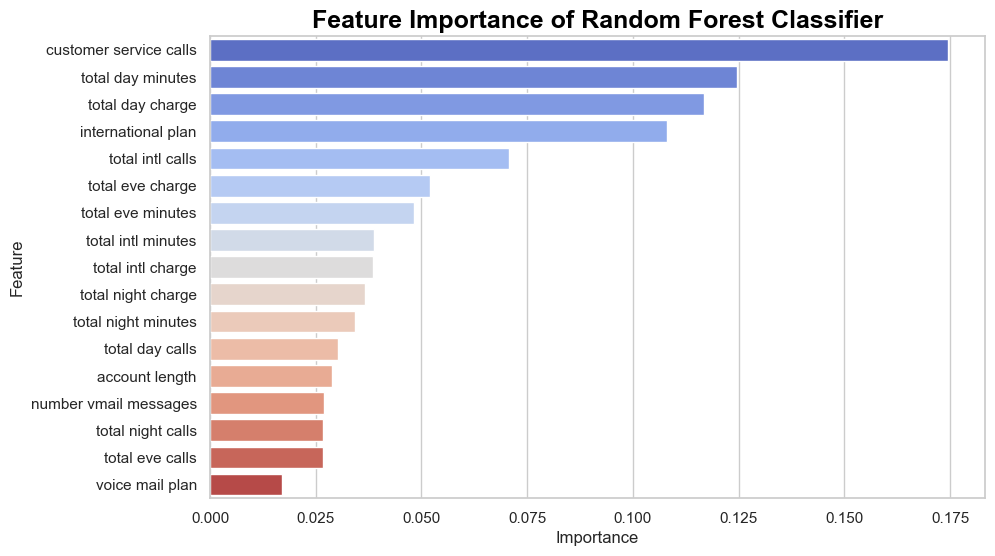

In [106]:
# Fit the best Random Forest model on the entire training data

rf.fit(X_train_resampled, y_train_resampled)


# Get feature importances
best_features = rf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': best_features})

# Sort features by importance in descending order
feature_importance_rf = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='coolwarm', hue='Feature', legend=False)
plt.title('Feature Importance of Random Forest Classifier', size=18, color='black', fontweight= 'bold')   
plt.show()

In [107]:
feature_importance_rf

Feature  Importance
16  customer service calls    0.174499
4        total day minutes    0.124693
6         total day charge    0.116875
1       international plan    0.107993
14        total intl calls    0.070586
9         total eve charge    0.052027
7        total eve minutes    0.048303
13      total intl minutes    0.038820
15       total intl charge    0.038423
12      total night charge    0.036577
10     total night minutes    0.034395
5          total day calls    0.030318
0           account length    0.028813
3    number vmail messages    0.026967
11       total night calls    0.026833
8          total eve calls    0.026782
2          voice mail plan    0.017096

8.2 FEATURE IMPORTNCE OF GRADIENT BOOSTING CLASSFIER
-------------------

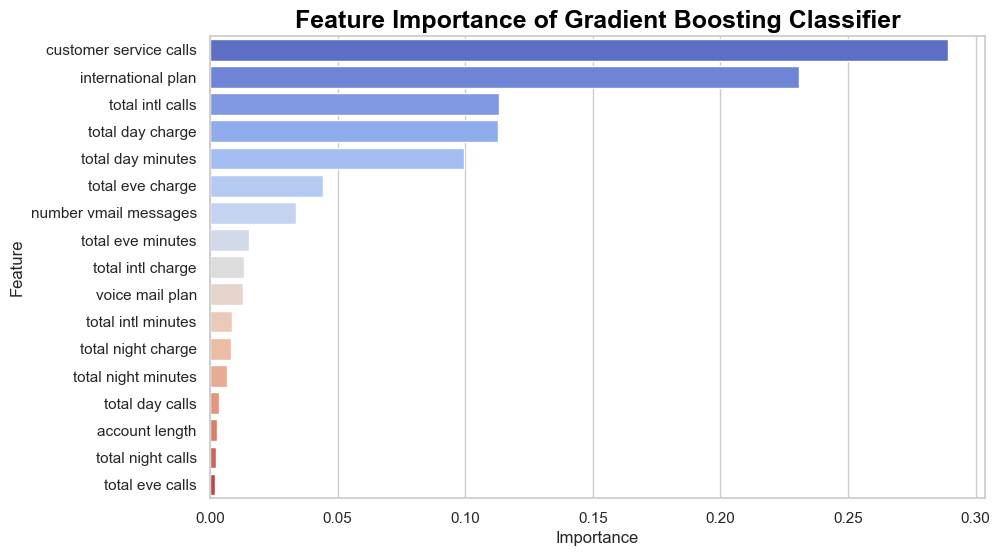

In [108]:
# Fit the best Random Forest model on the entire training data

gbc.fit(X_train_resampled, y_train_resampled)

# Get feature importances
best_features = gbc.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': best_features})

# Sort features by importance in descending order
feature_importance_gbc = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gbc, palette='coolwarm', hue='Feature', legend=False)
plt.title('Feature Importance of Gradient Boosting Classifier', size=18, color='black', fontweight= 'bold')   
plt.show()

In [109]:
feature_importance_gbc

Feature  Importance
16  customer service calls    0.289192
1       international plan    0.230718
14        total intl calls    0.113389
6         total day charge    0.112980
4        total day minutes    0.099373
9         total eve charge    0.044341
3    number vmail messages    0.033678
7        total eve minutes    0.015211
15       total intl charge    0.013432
2          voice mail plan    0.012999
13      total intl minutes    0.008705
12      total night charge    0.008206
10     total night minutes    0.006850
5          total day calls    0.003578
0           account length    0.002745
11       total night calls    0.002522
8          total eve calls    0.002084

9 PERMUTATION FEATURE IMPORTANCE
--------

9.1 RANDOM FOREST CLASSIFIER PERMUTATION FEATURE IMPORTANCE
------------------

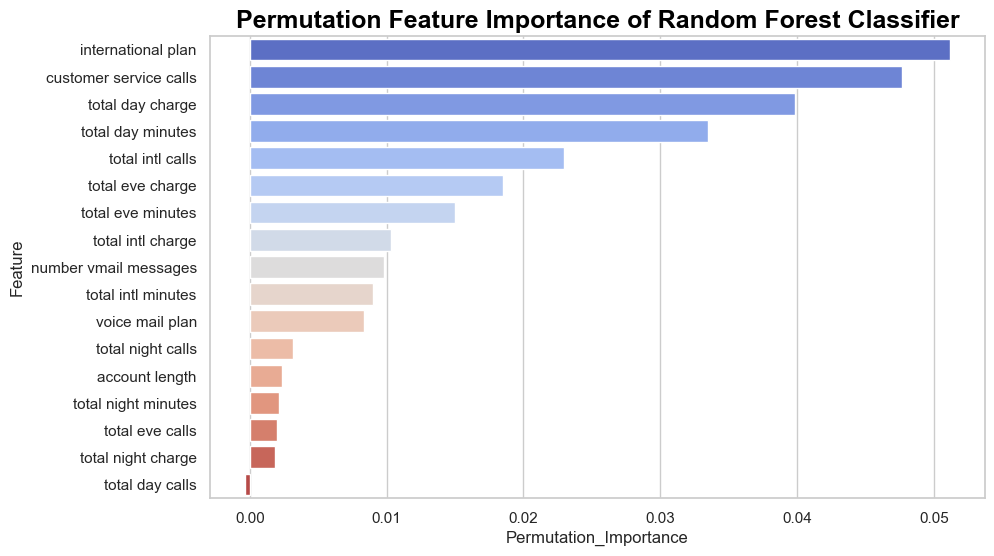

In [110]:
# Fit the best Random Forest model on the entire training data
rf.fit(X_train_resampled, y_train_resampled)

#Calculate permutation feature importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42) 

# Get permutation feature importances
permutation_importances = result.importances_mean

# Create a DataFrame to display feature names and their importances
permutation_df = pd.DataFrame({'Feature': X_test.columns, 'Permutation_Importance': permutation_importances})

# Sort Permuation features by importance in descending order
permutation_importance_rf = permutation_df.sort_values(by='Permutation_Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Permutation_Importance', y='Feature', data=permutation_importance_rf, palette='coolwarm', hue='Feature', legend=False)
plt.title('Permutation Feature Importance of Random Forest Classifier', size=18, color='black', fontweight= 'bold')   
plt.show()

In [111]:
permutation_importance_rf

Feature  Permutation_Importance
1       international plan                0.051167
16  customer service calls                0.047667
6         total day charge                0.039833
4        total day minutes                0.033500
14        total intl calls                0.023000
9         total eve charge                0.018500
7        total eve minutes                0.015000
15       total intl charge                0.010333
3    number vmail messages                0.009833
13      total intl minutes                0.009000
2          voice mail plan                0.008333
11       total night calls                0.003167
0           account length                0.002333
10     total night minutes                0.002167
8          total eve calls                0.002000
12      total night charge                0.001833
5          total day calls               -0.000333

9.2 GRADIENT BOOSTING CLASSIFIER PERMUTATION FEATURE IMPORTANCE
------------------

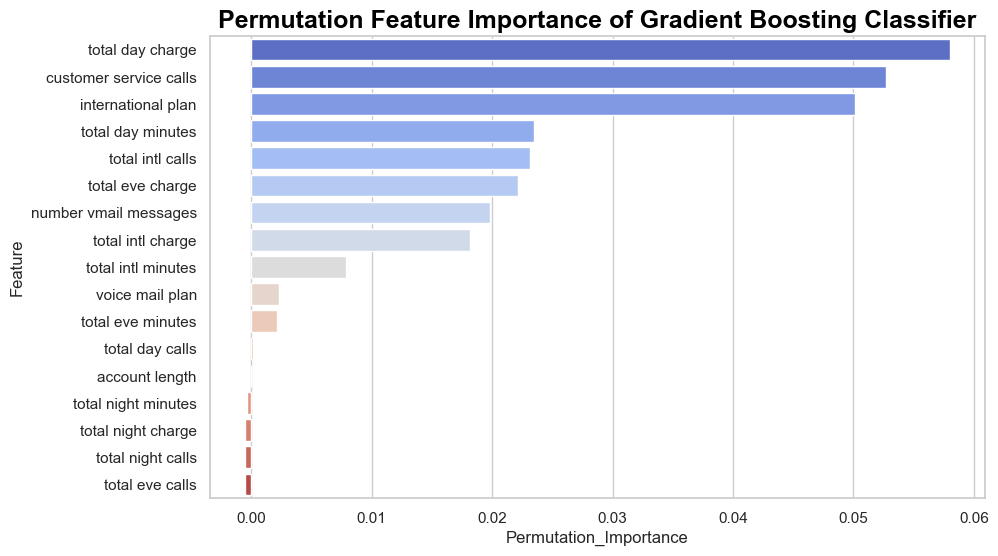

In [112]:
#from sklearn.inspection import permutation_importance
# Fit the best Random Forest model on the entire training data
gbc.fit(X_train_resampled, y_train_resampled)

#Calculate permutation feature importance
result = permutation_importance(gbc, X_test, y_test, n_repeats=10, random_state=42) 

# Get permutation feature importances
permutation_importances = result.importances_mean

# Create a DataFrame to display feature names and their importances
permutation_df = pd.DataFrame({'Feature': X_test.columns, 'Permutation_Importance': permutation_importances})

# Sort Permuation features by importance in descending order
permutation_importance_gbc = permutation_df.sort_values(by='Permutation_Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Permutation_Importance', y='Feature', data=permutation_importance_gbc, palette='coolwarm', hue='Feature', legend=False)
plt.title('Permutation Feature Importance of Gradient Boosting Classifier', size=18, color='black', fontweight= 'bold')   
plt.show()

In [113]:
permutation_importance_gbc

Feature  Permutation_Importance
6         total day charge            5.800000e-02
16  customer service calls            5.266667e-02
1       international plan            5.016667e-02
4        total day minutes            2.350000e-02
14        total intl calls            2.316667e-02
9         total eve charge            2.216667e-02
3    number vmail messages            1.983333e-02
15       total intl charge            1.816667e-02
13      total intl minutes            7.833333e-03
2          voice mail plan            2.333333e-03
7        total eve minutes            2.166667e-03
5          total day calls            1.666667e-04
0           account length            3.330669e-17
10     total night minutes           -3.333333e-04
12      total night charge           -5.000000e-04
11       total night calls           -5.000000e-04
8          total eve calls           -5.000000e-04

10 RECRUSIVE FEATURE ELIMINATION
----------------------

10.1 RANDOM FOREST CLASSIFIER
-----------

In [114]:
#from sklearn.feature_selection import RFE
#selector = RFE(rf_model, n_features_to_select=3)
rf.fit(X_train_resampled, y_train_resampled)
#Selected Features
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
selected_features = feature_importance[feature_importance['Importance'] > 0.05]
print("Selected Features:", selected_features)

Selected Features:                    Feature  Importance
1       international plan    0.107993
4        total day minutes    0.124693
6         total day charge    0.116875
9         total eve charge    0.052027
14        total intl calls    0.070586
16  customer service calls    0.174499


In [115]:
#Apply RFE
selector = RFE(rf, n_features_to_select=5)
selector = selector.fit(X_train_resampled, y_train_resampled)
#Selected Features
selected_features = X_test.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total intl calls', 'customer service calls'],
      dtype='object')


10.2 GRADIENT BOOSTING CLASSIFIER
-------------------

In [116]:
#from sklearn.feature_selection import RFE
#selector = RFE(gb_model, n_features_to_select=3)
gbc.fit(X_train_resampled, y_train_resampled)
#Selected Features
importances = gbc.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
selected_features = feature_importance[feature_importance['Importance'] > 0.05]
print("Selected Features:", selected_features)

Selected Features:                    Feature  Importance
1       international plan    0.230718
4        total day minutes    0.099373
6         total day charge    0.112980
14        total intl calls    0.113389
16  customer service calls    0.289192


In [117]:
#Apply RFE
selector = RFE(gbc, n_features_to_select=5)
selector = selector.fit(X_train_resampled, y_train_resampled)
#Selected Features
selected_features = X_test.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['international plan', 'total day minutes', 'total day charge',
       'total intl calls', 'customer service calls'],
      dtype='object')
